## About Practice Problem: HR Analytics
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.




Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

In [135]:
# Importing Necessary Librarires
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [136]:
train = pd.read_csv(r"C:\Users\HP\Downloads\train_LZdllcl.csv",na_values='?')
test = pd.read_csv(r"C:\Users\HP\Downloads\test_2umaH9m.csv",na_values='?')
submission = pd.read_csv(r"C:\Users\HP\Downloads\sample_submission_M0L0uXE.csv")

In [137]:
# preview the dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [138]:
# basic checks on the Dataset
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [139]:
# merge train and test
data = pd.concat([train,test],ignore_index=True)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [140]:
# Findng info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 8.4+ MB


## Exploratory Data Analysis:

## Univariate Analysis

In [141]:
cat = data.select_dtypes(include='object').columns
len(cat)

5

In [142]:
category=['department','region','education','gender','recruitment_channel',
          'no_of_trainings','previous_year_rating','KPIs_met >80%',
          'awards_won?','is_promoted']

In [143]:
num = data.select_dtypes(include=np.number).columns
len(num)

9

In [144]:
numeric=['age','length_of_service','avg_training_score']

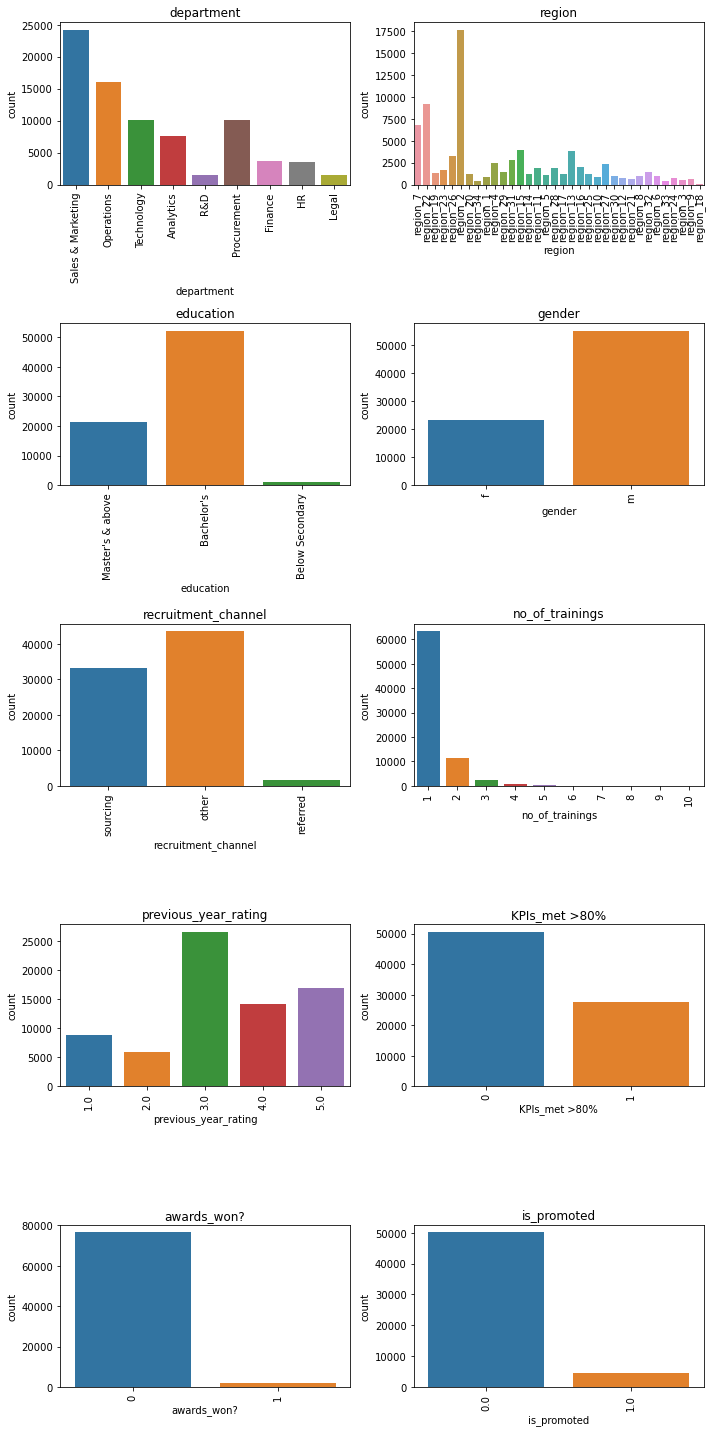

In [145]:
plt.rcParams['figure.figsize']=[10,6]
plt.figure(figsize=(10,20))

nrows=5
ncols=2
t=1

for i in category:
    plt.subplot(nrows,ncols,t)
    sns.countplot(x=i,data=data)
    plt.title(i)
    plt.xticks(rotation=90)
    t+=1
    
plt.tight_layout()
plt.show()

# Observations:
# Sales&Marketing, Operations, procurement, and Technology departments have the maximum no. of employees.

#  maximum number of employees belongs to region2.

# Maximum of the regions have less number. of employees.

# Maximum employees have Bachelor's Degree.

# The least number of employees have below secondary education.

# Male employees are higher in number than females.

# Maximum employees are recruited through the other channel

# Employees from referred recruitment channel are very low in number

# The Maximum employees have only 1 skill(no_of_training)

# Maximum employees had 3.0 Ratings previous year.

# Most of the employees do not meet the KPI>80 category.

# less employee  won the awards.

# There are very few promotions.

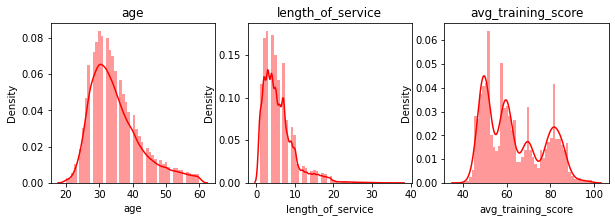

<Figure size 720x432 with 0 Axes>

In [146]:
plt.figure(figsize=(10,10))
t=1
for i in numeric:
    plt.subplot(3,3,t)
    sns.distplot(data[i],color='red')
    plt.title(i)
    t=t+1
    
plt.show()
plt.tight_layout()


# Observations:


# variable age is positively skewed. Maximum employees are of age 28 to 38.
# Company's maximum employees are working less than 7 years.
# The avg_training_score is a multimodal data. The employees have scored from 40 to 100 marks.

## Bivariate Analysis

<Figure size 720x360 with 0 Axes>

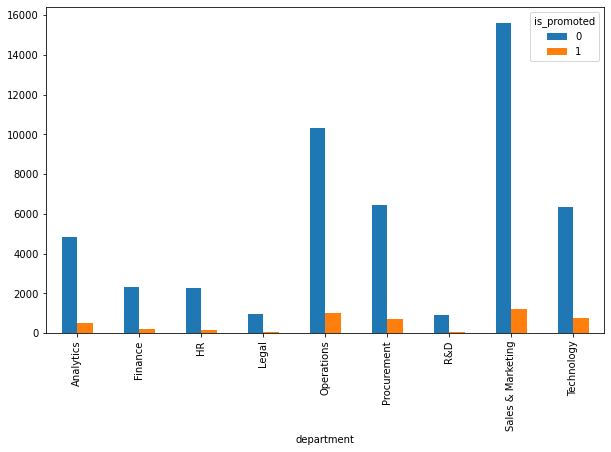

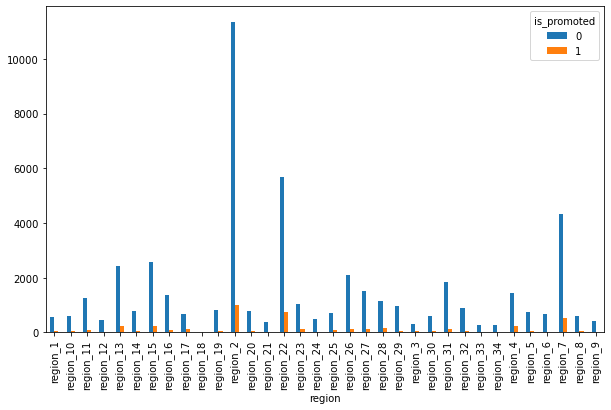

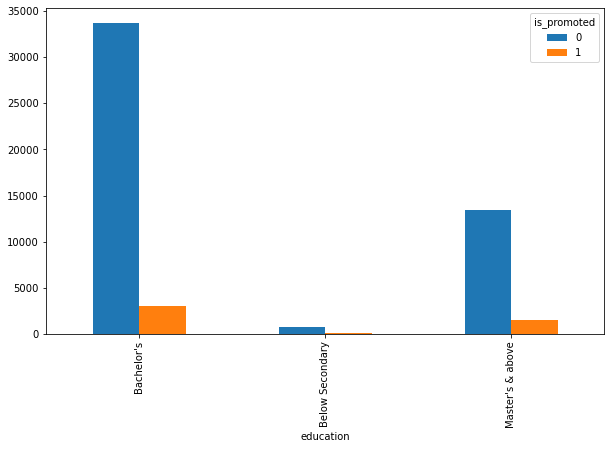

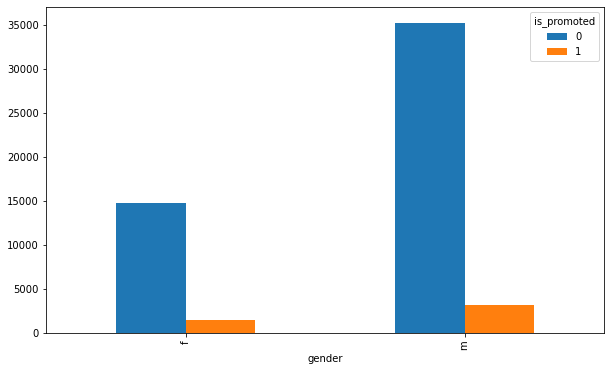

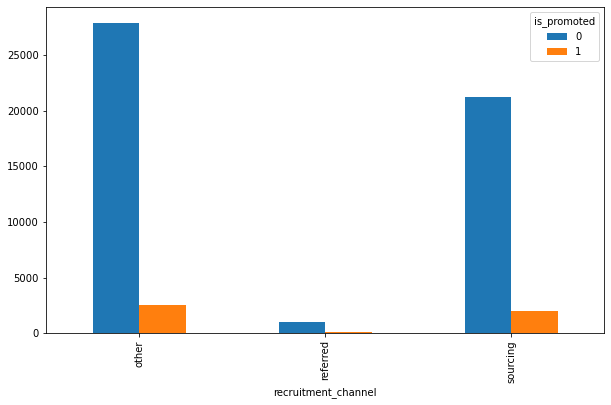

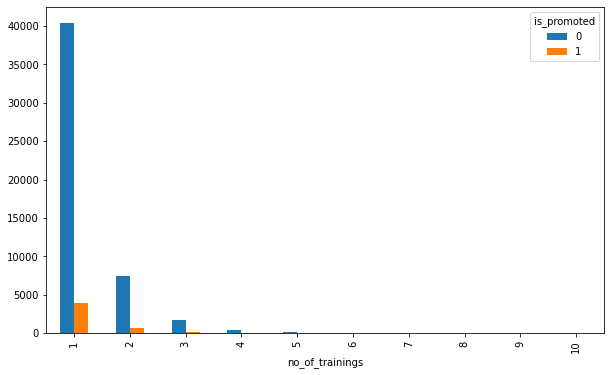

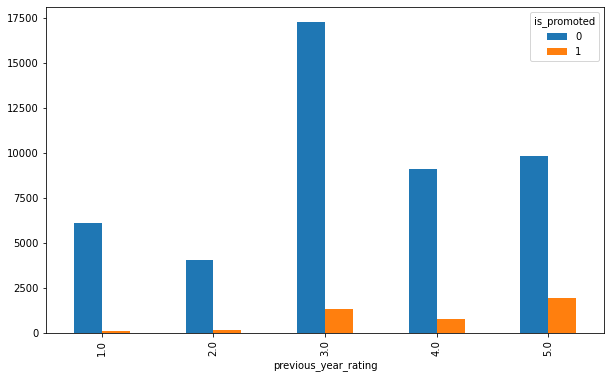

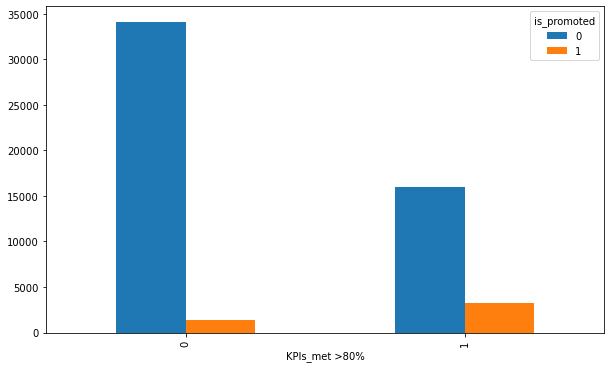

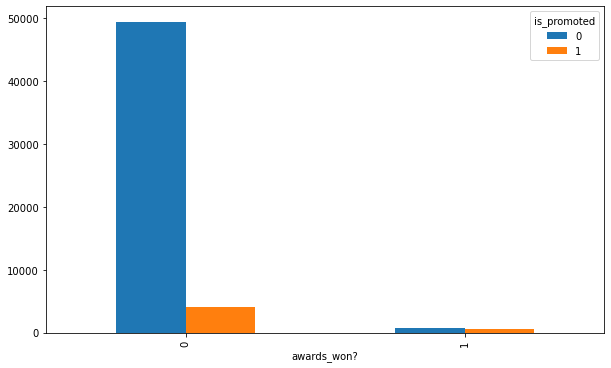

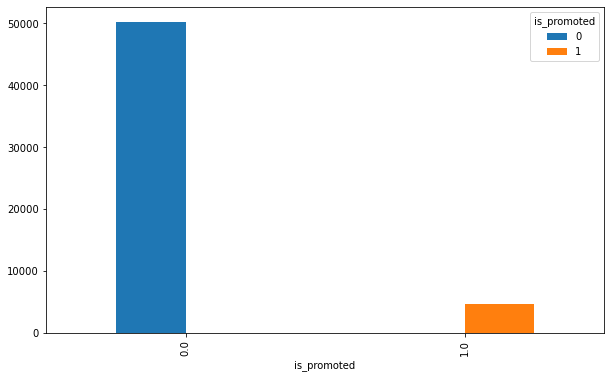

In [147]:
# category vs category

plt.figure(figsize=(10,5))

for i in category:
    pd.crosstab(data[i],train['is_promoted']).plot(kind='bar')
plt.show()

# Observations:
#Employees from Sales&Marketing,Operations,Procurement,Technology departments have maximum number of promotions.
#Employees from region_2,region_22,region_7 have maximum number of promotions.
#Employees having Bachelor's degree,Master's & above education have max chances of promotions.
#Employees having education below Secondary have almost negligible chances of promotions.
#Male Employees have higher chances of promotions.
#Employees from other,sourcing recruitment_channel have higher chances of promotions.
#Employees who are referred have very low chances of promotions.
#Employees with no_of_trainings 1 have very high chances of promotions.
#With increasing no_of_trainings, employees have fewer chances of promotions.
#Employees with rating 5 and 3 have highest chances of promotions.
#Employees with rating 1 and 2 have lowest chances of promotions.
#Employees with KPIs_met>80% have greater chances of promotions.
#Employees with no awards have higher chances of promotions.

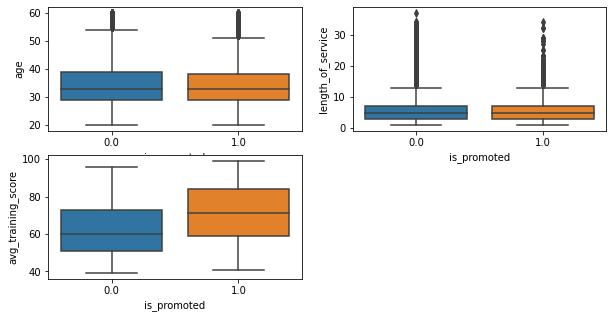

<Figure size 720x432 with 0 Axes>

In [148]:
# number vs category

plt.figure(figsize=(10,5))
t=1
for i in numeric:
    plt.subplot(2,2,t)
    sns.boxplot(data['is_promoted'],data[i])
    t+=1
plt.show() 
plt.tight_layout()

# Observations:
# Outliers present in the age.
# Promotion is not impacted by the length of service.
# Employees with higher avg_training_score have higher chances of promotions.

## Missing Value

In [149]:
data.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [150]:
# Education
data[data.education.isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0.0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0.0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0.0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0.0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78223,14036,Sales & Marketing,region_7,NaN,m,other,6,26,3.0,3,0,0,48,NaN
78232,5890,Analytics,region_15,NaN,m,sourcing,1,34,3.0,5,0,0,87,NaN
78260,65429,Analytics,region_15,NaN,m,sourcing,1,30,2.0,7,0,0,83,NaN
78267,30477,Sales & Marketing,region_22,NaN,m,other,1,31,2.0,7,0,0,52,NaN


In [151]:
data.groupby(['age','department'])['education'].value_counts()

age  department         education       
20   Analytics          Bachelor's           9
                        Master's & above     1
     Finance            Bachelor's           2
                        Below Secondary      1
     HR                 Below Secondary     16
                                            ..
60   Procurement        Bachelor's          25
     Sales & Marketing  Bachelor's          48
                        Master's & above    29
     Technology         Master's & above    28
                        Bachelor's          18
Name: education, Length: 682, dtype: int64

In [152]:
data.education.mode()

0    Bachelor's
Name: education, dtype: object

In [153]:
data['education'].fillna(value="Bachelor's",inplace=True)

In [154]:
data.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [155]:
# previous year rating
data.previous_year_rating.describe()[5]

3.0

In [156]:
data.previous_year_rating.fillna(data.previous_year_rating.describe()[5],inplace=True)

In [157]:
data.isnull().sum()


employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

## Feature Engineering

In [158]:
data['new'] = data.groupby('department')['employee_id'].transform('nunique')


In [159]:
data['Gratuity']=np.where(data.length_of_service>5,1,0)


In [160]:
data['recruitment_channel']=pd.factorize(data.recruitment_channel)[0]

In [161]:
data['age']=stats.boxcox(data.age)[0]
data['length_of_service']=stats.boxcox(data.length_of_service)[0]
data['avg_training_score']=stats.boxcox(data.avg_training_score)[0]

In [162]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,new,Gratuity
0,65438,Sales & Marketing,region_7,Master's & above,f,0,1,1.078158,5.0,2.447141,1,0,1.330082,0.0,24155,1
1,65141,Operations,region_22,Bachelor's,m,1,1,1.071131,5.0,1.543807,0,0,1.342315,0.0,16112,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,0,1,1.076909,3.0,2.265610,0,0,1.331382,0.0,24155,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,1,2,1.082547,1.0,2.758875,0,0,1.331382,0.0,24155,1
4,48945,Technology,region_26,Bachelor's,m,1,1,1.087740,3.0,0.731126,0,0,1.352611,0.0,10149,0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             78298 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  int64  
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  float64
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  float64
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  float64
 13  is_promoted           54808 non-null  float64
 14  new                   78298 non-null  int64  
 15  Gratuity           

In [164]:
data.drop(columns=['employee_id','Gratuity'],inplace=True)

## Train test split

In [165]:
newtrain = data.loc[0:train.shape[0]-1, :]

newtest = data.loc[train.shape[0]:, :]

In [100]:
# Encoding
dic={"Master's & above":3,"Bachelor's":2,"Below Secondary":1}
newtrain['education']=newtrain.education.map(dic)
newtest['education']=newtest.education.map(dic)

In [101]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
newtrain['new']=sc.fit_transform(pd.DataFrame(newtrain['new']))
newtest['new']=sc.transform(pd.DataFrame(newtest['new']))

In [102]:
newtest.drop("is_promoted", axis = 1, inplace = True)
newtrain.shape,newtest.shape

((54808, 14), (23490, 13))

In [103]:
dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

## Modelling

In [104]:
X = dummytrain.drop(columns='is_promoted')
y = dummytrain.is_promoted

In [105]:
# Random Forest Classifier

rf = RandomForestClassifier()
rf_pred = rf.fit(X, y).predict(dummytest)
sub = pd.DataFrame({"employee_id":test.employee_id, 
                     "is_promoted":rf_pred})
sub.is_promoted=sub.is_promoted.astype(dtype=int)
sub.to_csv("RfModeldata.csv", index = False)

In [111]:
# Decision tree classifier

dt = DecisionTreeClassifier(max_depth=4)
dt_pred = dt.fit(X,y).predict(dummytest)
sub = pd.DataFrame({"employee_id":test.employee_id, 
                     "is_promoted":dt_pred})
sub.is_promoted=sub.is_promoted.astype(dtype=int)
sub.to_csv("dtModeldata.csv", index = False)

In [113]:
# logistic Regression

lr = LogisticRegression()
lr_pred= lr.fit(X,y).predict(dummytest)
sub = pd.DataFrame({"employee_id":test.employee_id, 
                     "is_promoted":lr_pred})
sub.is_promoted=sub.is_promoted.astype(dtype=int)
sub.to_csv("lrModeldata.csv", index = False)

In [114]:
# Ada Boost Classifier

Ada = AdaBoostClassifier()
Ada_pred= Ada.fit(X,y).predict(dummytest)
sub = pd.DataFrame({"employee_id":test.employee_id, 
                     "is_promoted":Ada_pred})
sub.is_promoted=sub.is_promoted.astype(dtype=int)
sub.to_csv("AdaModeldata.csv", index = False)

In [116]:
# grid Search CV

params = {'n_estimators':[100,200],'max_depth':[2,3,4,5,6],'criterion':['gini','entropy']}
grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='f1',cv=3,verbose=3)
grid.fit(X,y)
grid.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=100;, score=0.000 total time=   0.5s
[CV 2/3] END criterion=gini, max_depth=2, n_estimators=100;, score=0.000 total time=   0.5s
[CV 3/3] END criterion=gini, max_depth=2, n_estimators=100;, score=0.000 total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=200;, score=0.000 total time=   1.1s
[CV 2/3] END criterion=gini, max_depth=2, n_estimators=200;, score=0.000 total time=   1.1s
[CV 3/3] END criterion=gini, max_depth=2, n_estimators=200;, score=0.000 total time=   1.1s
[CV 1/3] END criterion=gini, max_depth=3, n_estimators=100;, score=0.001 total time=   0.6s
[CV 2/3] END criterion=gini, max_depth=3, n_estimators=100;, score=0.000 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=3, n_estimators=100;, score=0.003 total time=   0.7s
[CV 1/3] END criterion=gini, max_depth=3, n_estimators=200;, score=0.013 total time=   1.4s
[CV 2/3] END criter

RandomForestClassifier(max_depth=6)

In [117]:
# Random forest classifier after parameter tuning

rf= RandomForestClassifier(max_depth=6)
rf_pred= rf.fit(X,y).predict(dummytest)
sub = pd.DataFrame({"employee_id":test.employee_id, 
                     "is_promoted":rf_pred})
sub.is_promoted=sub.is_promoted.astype(dtype=int)
sub.to_csv("randomModeldata.csv", index = False)

In [118]:
# Applying SMOTE

sampler = SMOTE()
r_X,r_y= sampler.fit_resample(X,y)

In [119]:
# Random Forest classifier after SMOTE

rf= RandomForestClassifier(max_depth=6)
rf_pred= rf.fit(r_X,r_y).predict(dummytest)
sub = pd.DataFrame({"employee_id":test.employee_id, 
                     "is_promoted":rf_pred})
sub.is_promoted=sub.is_promoted.astype(dtype=int)
sub.to_csv("randomModeldataaftersmote.csv", index = False)

In [122]:
# XGBoost

xgb=XGBClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_xgb=[]
for train_index, test_index in kfold.split(r_X,r_y):
    xtrain=r_X.iloc[train_index]
    ytrain=r_y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict(dummytest))

In [123]:
submission["is_promoted"]=pd.DataFrame(np.array(pred_xgb)[0].astype(dtype=int))
submission.to_csv('XGBModel_aftersmote.csv',index=False)

In [126]:
# K fold cross validation

kfold = KFold(n_splits=5,random_state= 42,shuffle = True)

rf_pred = []

for train_index, test_index in kfold.split(r_X,r_y):
    xtrain = r_X.loc[train_index]
    ytrain = r_y.loc[train_index]
    rf_pred.append(rf.fit(xtrain,ytrain).predict(dummytest))

In [128]:
vals = pd.DataFrame(rf_pred).T.mean(axis = 1).astype(dtype=int)
submission['is_promoted']=np.abs(vals)
submission.to_csv('RandomForestcrossaftersmote.csv',index=False)   # 

In [130]:
# LGBM classifier

lgb=LGBMClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_lgb=[]
for train_index, test_index in kfold.split(r_X,r_y):
    xtrain=r_X.iloc[train_index]
    ytrain=r_y.iloc[train_index]
    pred_lgb.append(lgb.fit(xtrain,ytrain).predict(dummytest))

In [131]:
submission["is_promoted"]=pd.DataFrame(np.array(pred_lgb)[0].astype(dtype=int))
submission.to_csv('LGBModel_aftersmote.csv',index=False)                        #0.487

In [133]:
# CatBoost Classifier
cat=CatBoostClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_cat=[]
for train_index, test_index in kfold.split(r_X,r_y):
    xtrain=r_X.iloc[train_index]
    ytrain=r_y.iloc[train_index]
    pred_cat.append(cat.fit(xtrain,ytrain).predict(dummytest))

Learning rate set to 0.067
0:	learn: 0.6554186	total: 183ms	remaining: 3m 2s
1:	learn: 0.6205063	total: 199ms	remaining: 1m 39s
2:	learn: 0.5964577	total: 214ms	remaining: 1m 11s
3:	learn: 0.5698001	total: 228ms	remaining: 56.7s
4:	learn: 0.5501526	total: 240ms	remaining: 47.9s
5:	learn: 0.5354261	total: 253ms	remaining: 41.8s
6:	learn: 0.5228320	total: 265ms	remaining: 37.6s
7:	learn: 0.5103387	total: 276ms	remaining: 34.3s
8:	learn: 0.4990791	total: 288ms	remaining: 31.7s
9:	learn: 0.4901116	total: 299ms	remaining: 29.6s
10:	learn: 0.4832562	total: 310ms	remaining: 27.9s
11:	learn: 0.4751316	total: 322ms	remaining: 26.5s
12:	learn: 0.4699892	total: 333ms	remaining: 25.3s
13:	learn: 0.4649113	total: 344ms	remaining: 24.2s
14:	learn: 0.4579827	total: 357ms	remaining: 23.4s
15:	learn: 0.4497508	total: 369ms	remaining: 22.7s
16:	learn: 0.4430127	total: 381ms	remaining: 22.1s
17:	learn: 0.4382427	total: 396ms	remaining: 21.6s
18:	learn: 0.4328634	total: 410ms	remaining: 21.2s
19:	learn: 0

163:	learn: 0.1740126	total: 2.36s	remaining: 12s
164:	learn: 0.1733887	total: 2.37s	remaining: 12s
165:	learn: 0.1731627	total: 2.38s	remaining: 12s
166:	learn: 0.1727158	total: 2.4s	remaining: 12s
167:	learn: 0.1725117	total: 2.42s	remaining: 12s
168:	learn: 0.1709265	total: 2.44s	remaining: 12s
169:	learn: 0.1704715	total: 2.45s	remaining: 12s
170:	learn: 0.1698878	total: 2.47s	remaining: 12s
171:	learn: 0.1692393	total: 2.49s	remaining: 12s
172:	learn: 0.1686436	total: 2.5s	remaining: 12s
173:	learn: 0.1679609	total: 2.52s	remaining: 12s
174:	learn: 0.1670890	total: 2.53s	remaining: 11.9s
175:	learn: 0.1667889	total: 2.55s	remaining: 11.9s
176:	learn: 0.1664775	total: 2.56s	remaining: 11.9s
177:	learn: 0.1657168	total: 2.58s	remaining: 11.9s
178:	learn: 0.1644405	total: 2.59s	remaining: 11.9s
179:	learn: 0.1636973	total: 2.6s	remaining: 11.9s
180:	learn: 0.1634389	total: 2.62s	remaining: 11.8s
181:	learn: 0.1631285	total: 2.63s	remaining: 11.8s
182:	learn: 0.1629691	total: 2.64s	re

327:	learn: 0.1226826	total: 4.56s	remaining: 9.35s
328:	learn: 0.1225957	total: 4.58s	remaining: 9.33s
329:	learn: 0.1224470	total: 4.59s	remaining: 9.32s
330:	learn: 0.1223490	total: 4.6s	remaining: 9.3s
331:	learn: 0.1220479	total: 4.62s	remaining: 9.29s
332:	learn: 0.1219463	total: 4.63s	remaining: 9.28s
333:	learn: 0.1218964	total: 4.64s	remaining: 9.26s
334:	learn: 0.1213525	total: 4.66s	remaining: 9.25s
335:	learn: 0.1210437	total: 4.67s	remaining: 9.23s
336:	learn: 0.1209526	total: 4.68s	remaining: 9.22s
337:	learn: 0.1209041	total: 4.7s	remaining: 9.21s
338:	learn: 0.1207837	total: 4.72s	remaining: 9.2s
339:	learn: 0.1206202	total: 4.73s	remaining: 9.18s
340:	learn: 0.1205220	total: 4.75s	remaining: 9.18s
341:	learn: 0.1202476	total: 4.76s	remaining: 9.16s
342:	learn: 0.1200710	total: 4.78s	remaining: 9.15s
343:	learn: 0.1198914	total: 4.79s	remaining: 9.13s
344:	learn: 0.1197841	total: 4.8s	remaining: 9.12s
345:	learn: 0.1197158	total: 4.82s	remaining: 9.1s
346:	learn: 0.1196

489:	learn: 0.1060944	total: 6.73s	remaining: 7.01s
490:	learn: 0.1060616	total: 6.75s	remaining: 6.99s
491:	learn: 0.1060166	total: 6.76s	remaining: 6.98s
492:	learn: 0.1059336	total: 6.77s	remaining: 6.96s
493:	learn: 0.1058960	total: 6.79s	remaining: 6.95s
494:	learn: 0.1058646	total: 6.8s	remaining: 6.93s
495:	learn: 0.1058248	total: 6.81s	remaining: 6.92s
496:	learn: 0.1057644	total: 6.82s	remaining: 6.91s
497:	learn: 0.1057341	total: 6.83s	remaining: 6.89s
498:	learn: 0.1056987	total: 6.85s	remaining: 6.88s
499:	learn: 0.1056398	total: 6.86s	remaining: 6.86s
500:	learn: 0.1055613	total: 6.87s	remaining: 6.85s
501:	learn: 0.1055151	total: 6.89s	remaining: 6.83s
502:	learn: 0.1054938	total: 6.9s	remaining: 6.82s
503:	learn: 0.1054505	total: 6.91s	remaining: 6.8s
504:	learn: 0.1053941	total: 6.93s	remaining: 6.79s
505:	learn: 0.1053709	total: 6.94s	remaining: 6.78s
506:	learn: 0.1053166	total: 6.95s	remaining: 6.76s
507:	learn: 0.1051958	total: 6.97s	remaining: 6.75s
508:	learn: 0.1

661:	learn: 0.0976990	total: 9.12s	remaining: 4.66s
662:	learn: 0.0976658	total: 9.14s	remaining: 4.64s
663:	learn: 0.0976250	total: 9.15s	remaining: 4.63s
664:	learn: 0.0975993	total: 9.16s	remaining: 4.62s
665:	learn: 0.0975722	total: 9.18s	remaining: 4.61s
666:	learn: 0.0975328	total: 9.2s	remaining: 4.59s
667:	learn: 0.0975030	total: 9.21s	remaining: 4.58s
668:	learn: 0.0974684	total: 9.23s	remaining: 4.56s
669:	learn: 0.0974509	total: 9.24s	remaining: 4.55s
670:	learn: 0.0973993	total: 9.26s	remaining: 4.54s
671:	learn: 0.0973792	total: 9.27s	remaining: 4.53s
672:	learn: 0.0973391	total: 9.29s	remaining: 4.51s
673:	learn: 0.0973028	total: 9.3s	remaining: 4.5s
674:	learn: 0.0972734	total: 9.32s	remaining: 4.49s
675:	learn: 0.0972248	total: 9.33s	remaining: 4.47s
676:	learn: 0.0971698	total: 9.34s	remaining: 4.46s
677:	learn: 0.0971529	total: 9.36s	remaining: 4.44s
678:	learn: 0.0971340	total: 9.37s	remaining: 4.43s
679:	learn: 0.0970786	total: 9.38s	remaining: 4.42s
680:	learn: 0.0

828:	learn: 0.0918641	total: 11.3s	remaining: 2.32s
829:	learn: 0.0918343	total: 11.3s	remaining: 2.31s
830:	learn: 0.0918032	total: 11.3s	remaining: 2.29s
831:	learn: 0.0917797	total: 11.3s	remaining: 2.28s
832:	learn: 0.0917595	total: 11.3s	remaining: 2.27s
833:	learn: 0.0917399	total: 11.3s	remaining: 2.25s
834:	learn: 0.0917169	total: 11.3s	remaining: 2.24s
835:	learn: 0.0916859	total: 11.3s	remaining: 2.23s
836:	learn: 0.0916555	total: 11.4s	remaining: 2.21s
837:	learn: 0.0916222	total: 11.4s	remaining: 2.2s
838:	learn: 0.0915923	total: 11.4s	remaining: 2.18s
839:	learn: 0.0915721	total: 11.4s	remaining: 2.17s
840:	learn: 0.0915413	total: 11.4s	remaining: 2.15s
841:	learn: 0.0915167	total: 11.4s	remaining: 2.14s
842:	learn: 0.0914823	total: 11.4s	remaining: 2.13s
843:	learn: 0.0914635	total: 11.4s	remaining: 2.11s
844:	learn: 0.0914264	total: 11.4s	remaining: 2.1s
845:	learn: 0.0913739	total: 11.5s	remaining: 2.09s
846:	learn: 0.0913497	total: 11.5s	remaining: 2.07s
847:	learn: 0.

995:	learn: 0.0870792	total: 13.4s	remaining: 53.9ms
996:	learn: 0.0870350	total: 13.4s	remaining: 40.4ms
997:	learn: 0.0869838	total: 13.5s	remaining: 27ms
998:	learn: 0.0869669	total: 13.5s	remaining: 13.5ms
999:	learn: 0.0869322	total: 13.5s	remaining: 0us
Learning rate set to 0.067
0:	learn: 0.6539003	total: 13.6ms	remaining: 13.5s
1:	learn: 0.6191299	total: 27.6ms	remaining: 13.8s
2:	learn: 0.5948739	total: 41.3ms	remaining: 13.7s
3:	learn: 0.5770155	total: 55.4ms	remaining: 13.8s
4:	learn: 0.5603330	total: 69.4ms	remaining: 13.8s
5:	learn: 0.5405756	total: 83.4ms	remaining: 13.8s
6:	learn: 0.5277678	total: 97.6ms	remaining: 13.8s
7:	learn: 0.5144658	total: 111ms	remaining: 13.8s
8:	learn: 0.5052940	total: 125ms	remaining: 13.8s
9:	learn: 0.4943822	total: 139ms	remaining: 13.8s
10:	learn: 0.4841680	total: 151ms	remaining: 13.6s
11:	learn: 0.4744564	total: 164ms	remaining: 13.5s
12:	learn: 0.4682363	total: 176ms	remaining: 13.4s
13:	learn: 0.4605096	total: 189ms	remaining: 13.3s
14

155:	learn: 0.1802011	total: 1.98s	remaining: 10.7s
156:	learn: 0.1798028	total: 1.99s	remaining: 10.7s
157:	learn: 0.1796610	total: 2s	remaining: 10.7s
158:	learn: 0.1791162	total: 2.01s	remaining: 10.7s
159:	learn: 0.1772199	total: 2.03s	remaining: 10.6s
160:	learn: 0.1761478	total: 2.04s	remaining: 10.6s
161:	learn: 0.1754952	total: 2.05s	remaining: 10.6s
162:	learn: 0.1749227	total: 2.06s	remaining: 10.6s
163:	learn: 0.1742900	total: 2.08s	remaining: 10.6s
164:	learn: 0.1740502	total: 2.09s	remaining: 10.6s
165:	learn: 0.1734370	total: 2.1s	remaining: 10.6s
166:	learn: 0.1733019	total: 2.11s	remaining: 10.5s
167:	learn: 0.1731711	total: 2.13s	remaining: 10.5s
168:	learn: 0.1726971	total: 2.14s	remaining: 10.5s
169:	learn: 0.1724429	total: 2.15s	remaining: 10.5s
170:	learn: 0.1723345	total: 2.17s	remaining: 10.5s
171:	learn: 0.1714353	total: 2.18s	remaining: 10.5s
172:	learn: 0.1709900	total: 2.19s	remaining: 10.5s
173:	learn: 0.1708718	total: 2.2s	remaining: 10.4s
174:	learn: 0.170

315:	learn: 0.1215171	total: 4.15s	remaining: 8.99s
316:	learn: 0.1213740	total: 4.17s	remaining: 8.99s
317:	learn: 0.1213108	total: 4.19s	remaining: 8.98s
318:	learn: 0.1209539	total: 4.2s	remaining: 8.97s
319:	learn: 0.1208857	total: 4.21s	remaining: 8.96s
320:	learn: 0.1207987	total: 4.23s	remaining: 8.94s
321:	learn: 0.1207319	total: 4.24s	remaining: 8.93s
322:	learn: 0.1205403	total: 4.25s	remaining: 8.91s
323:	learn: 0.1203906	total: 4.26s	remaining: 8.9s
324:	learn: 0.1201704	total: 4.28s	remaining: 8.88s
325:	learn: 0.1199780	total: 4.29s	remaining: 8.87s
326:	learn: 0.1197813	total: 4.3s	remaining: 8.85s
327:	learn: 0.1196532	total: 4.31s	remaining: 8.83s
328:	learn: 0.1195899	total: 4.32s	remaining: 8.82s
329:	learn: 0.1195152	total: 4.33s	remaining: 8.8s
330:	learn: 0.1194563	total: 4.35s	remaining: 8.8s
331:	learn: 0.1194170	total: 4.37s	remaining: 8.78s
332:	learn: 0.1193094	total: 4.38s	remaining: 8.77s
333:	learn: 0.1192373	total: 4.39s	remaining: 8.76s
334:	learn: 0.119

479:	learn: 0.1051190	total: 6.37s	remaining: 6.9s
480:	learn: 0.1050104	total: 6.38s	remaining: 6.88s
481:	learn: 0.1049550	total: 6.39s	remaining: 6.87s
482:	learn: 0.1049327	total: 6.41s	remaining: 6.86s
483:	learn: 0.1049012	total: 6.42s	remaining: 6.84s
484:	learn: 0.1047978	total: 6.43s	remaining: 6.83s
485:	learn: 0.1047564	total: 6.44s	remaining: 6.81s
486:	learn: 0.1046428	total: 6.45s	remaining: 6.8s
487:	learn: 0.1045733	total: 6.46s	remaining: 6.78s
488:	learn: 0.1044370	total: 6.48s	remaining: 6.77s
489:	learn: 0.1043691	total: 6.49s	remaining: 6.76s
490:	learn: 0.1043367	total: 6.5s	remaining: 6.74s
491:	learn: 0.1042858	total: 6.51s	remaining: 6.73s
492:	learn: 0.1042292	total: 6.53s	remaining: 6.71s
493:	learn: 0.1041597	total: 6.54s	remaining: 6.7s
494:	learn: 0.1041286	total: 6.55s	remaining: 6.68s
495:	learn: 0.1040457	total: 6.57s	remaining: 6.68s
496:	learn: 0.1039901	total: 6.59s	remaining: 6.67s
497:	learn: 0.1039297	total: 6.6s	remaining: 6.65s
498:	learn: 0.103

644:	learn: 0.0969647	total: 8.54s	remaining: 4.7s
645:	learn: 0.0969419	total: 8.56s	remaining: 4.69s
646:	learn: 0.0968986	total: 8.57s	remaining: 4.67s
647:	learn: 0.0968434	total: 8.58s	remaining: 4.66s
648:	learn: 0.0967786	total: 8.6s	remaining: 4.65s
649:	learn: 0.0967421	total: 8.61s	remaining: 4.63s
650:	learn: 0.0967023	total: 8.62s	remaining: 4.62s
651:	learn: 0.0966195	total: 8.63s	remaining: 4.61s
652:	learn: 0.0965964	total: 8.64s	remaining: 4.59s
653:	learn: 0.0965517	total: 8.66s	remaining: 4.58s
654:	learn: 0.0965110	total: 8.67s	remaining: 4.57s
655:	learn: 0.0964689	total: 8.68s	remaining: 4.55s
656:	learn: 0.0964061	total: 8.69s	remaining: 4.54s
657:	learn: 0.0963690	total: 8.71s	remaining: 4.53s
658:	learn: 0.0963222	total: 8.72s	remaining: 4.51s
659:	learn: 0.0962463	total: 8.74s	remaining: 4.5s
660:	learn: 0.0962023	total: 8.75s	remaining: 4.49s
661:	learn: 0.0961570	total: 8.76s	remaining: 4.47s
662:	learn: 0.0960947	total: 8.77s	remaining: 4.46s
663:	learn: 0.0

808:	learn: 0.0911704	total: 10.7s	remaining: 2.53s
809:	learn: 0.0911404	total: 10.7s	remaining: 2.51s
810:	learn: 0.0910731	total: 10.7s	remaining: 2.5s
811:	learn: 0.0910412	total: 10.7s	remaining: 2.49s
812:	learn: 0.0909958	total: 10.8s	remaining: 2.47s
813:	learn: 0.0909692	total: 10.8s	remaining: 2.46s
814:	learn: 0.0909555	total: 10.8s	remaining: 2.45s
815:	learn: 0.0909145	total: 10.8s	remaining: 2.43s
816:	learn: 0.0908868	total: 10.8s	remaining: 2.42s
817:	learn: 0.0908546	total: 10.8s	remaining: 2.41s
818:	learn: 0.0908190	total: 10.8s	remaining: 2.39s
819:	learn: 0.0907987	total: 10.8s	remaining: 2.38s
820:	learn: 0.0907701	total: 10.9s	remaining: 2.37s
821:	learn: 0.0907199	total: 10.9s	remaining: 2.35s
822:	learn: 0.0906739	total: 10.9s	remaining: 2.34s
823:	learn: 0.0906518	total: 10.9s	remaining: 2.33s
824:	learn: 0.0906261	total: 10.9s	remaining: 2.31s
825:	learn: 0.0905879	total: 10.9s	remaining: 2.3s
826:	learn: 0.0905599	total: 10.9s	remaining: 2.29s
827:	learn: 0.

972:	learn: 0.0861905	total: 12.9s	remaining: 357ms
973:	learn: 0.0861678	total: 12.9s	remaining: 344ms
974:	learn: 0.0861370	total: 12.9s	remaining: 331ms
975:	learn: 0.0861322	total: 12.9s	remaining: 318ms
976:	learn: 0.0861119	total: 12.9s	remaining: 304ms
977:	learn: 0.0860910	total: 12.9s	remaining: 291ms
978:	learn: 0.0860834	total: 12.9s	remaining: 278ms
979:	learn: 0.0860304	total: 13s	remaining: 265ms
980:	learn: 0.0860178	total: 13s	remaining: 251ms
981:	learn: 0.0860006	total: 13s	remaining: 238ms
982:	learn: 0.0859776	total: 13s	remaining: 225ms
983:	learn: 0.0859628	total: 13s	remaining: 212ms
984:	learn: 0.0859270	total: 13s	remaining: 198ms
985:	learn: 0.0858820	total: 13s	remaining: 185ms
986:	learn: 0.0858625	total: 13.1s	remaining: 172ms
987:	learn: 0.0858212	total: 13.1s	remaining: 159ms
988:	learn: 0.0857955	total: 13.1s	remaining: 146ms
989:	learn: 0.0857855	total: 13.1s	remaining: 132ms
990:	learn: 0.0857670	total: 13.1s	remaining: 119ms
991:	learn: 0.0857325	tota

137:	learn: 0.1879618	total: 1.74s	remaining: 10.9s
138:	learn: 0.1875087	total: 1.75s	remaining: 10.9s
139:	learn: 0.1868547	total: 1.77s	remaining: 10.9s
140:	learn: 0.1864823	total: 1.78s	remaining: 10.9s
141:	learn: 0.1854413	total: 1.79s	remaining: 10.8s
142:	learn: 0.1847664	total: 1.81s	remaining: 10.8s
143:	learn: 0.1828807	total: 1.82s	remaining: 10.8s
144:	learn: 0.1823035	total: 1.83s	remaining: 10.8s
145:	learn: 0.1819068	total: 1.84s	remaining: 10.8s
146:	learn: 0.1811917	total: 1.85s	remaining: 10.8s
147:	learn: 0.1809313	total: 1.87s	remaining: 10.7s
148:	learn: 0.1805561	total: 1.88s	remaining: 10.7s
149:	learn: 0.1800485	total: 1.89s	remaining: 10.7s
150:	learn: 0.1797916	total: 1.9s	remaining: 10.7s
151:	learn: 0.1796011	total: 1.91s	remaining: 10.7s
152:	learn: 0.1794092	total: 1.93s	remaining: 10.7s
153:	learn: 0.1790537	total: 1.94s	remaining: 10.7s
154:	learn: 0.1788357	total: 1.96s	remaining: 10.7s
155:	learn: 0.1782107	total: 1.97s	remaining: 10.7s
156:	learn: 0

304:	learn: 0.1225095	total: 3.93s	remaining: 8.96s
305:	learn: 0.1222761	total: 3.95s	remaining: 8.95s
306:	learn: 0.1220888	total: 3.98s	remaining: 8.99s
307:	learn: 0.1219945	total: 4s	remaining: 8.98s
308:	learn: 0.1218757	total: 4.01s	remaining: 8.97s
309:	learn: 0.1218148	total: 4.03s	remaining: 8.96s
310:	learn: 0.1217310	total: 4.04s	remaining: 8.95s
311:	learn: 0.1216705	total: 4.05s	remaining: 8.93s
312:	learn: 0.1216051	total: 4.06s	remaining: 8.92s
313:	learn: 0.1215175	total: 4.08s	remaining: 8.9s
314:	learn: 0.1213075	total: 4.09s	remaining: 8.89s
315:	learn: 0.1212161	total: 4.1s	remaining: 8.88s
316:	learn: 0.1211510	total: 4.11s	remaining: 8.86s
317:	learn: 0.1210700	total: 4.13s	remaining: 8.85s
318:	learn: 0.1209240	total: 4.14s	remaining: 8.84s
319:	learn: 0.1207872	total: 4.16s	remaining: 8.83s
320:	learn: 0.1206691	total: 4.17s	remaining: 8.82s
321:	learn: 0.1205193	total: 4.18s	remaining: 8.8s
322:	learn: 0.1204476	total: 4.19s	remaining: 8.79s
323:	learn: 0.1200

474:	learn: 0.1063247	total: 6.11s	remaining: 6.75s
475:	learn: 0.1062646	total: 6.12s	remaining: 6.74s
476:	learn: 0.1061904	total: 6.14s	remaining: 6.73s
477:	learn: 0.1061480	total: 6.15s	remaining: 6.71s
478:	learn: 0.1060003	total: 6.16s	remaining: 6.7s
479:	learn: 0.1059444	total: 6.17s	remaining: 6.68s
480:	learn: 0.1058947	total: 6.18s	remaining: 6.67s
481:	learn: 0.1058506	total: 6.2s	remaining: 6.66s
482:	learn: 0.1058140	total: 6.21s	remaining: 6.64s
483:	learn: 0.1057779	total: 6.22s	remaining: 6.63s
484:	learn: 0.1057437	total: 6.23s	remaining: 6.62s
485:	learn: 0.1056533	total: 6.24s	remaining: 6.6s
486:	learn: 0.1056210	total: 6.25s	remaining: 6.59s
487:	learn: 0.1055701	total: 6.26s	remaining: 6.57s
488:	learn: 0.1055218	total: 6.28s	remaining: 6.56s
489:	learn: 0.1054558	total: 6.29s	remaining: 6.55s
490:	learn: 0.1054083	total: 6.3s	remaining: 6.54s
491:	learn: 0.1053672	total: 6.32s	remaining: 6.53s
492:	learn: 0.1053250	total: 6.33s	remaining: 6.51s
493:	learn: 0.10

647:	learn: 0.0979126	total: 8.3s	remaining: 4.51s
648:	learn: 0.0978693	total: 8.31s	remaining: 4.5s
649:	learn: 0.0978316	total: 8.33s	remaining: 4.48s
650:	learn: 0.0978105	total: 8.34s	remaining: 4.47s
651:	learn: 0.0977820	total: 8.35s	remaining: 4.46s
652:	learn: 0.0977539	total: 8.37s	remaining: 4.45s
653:	learn: 0.0976532	total: 8.38s	remaining: 4.43s
654:	learn: 0.0976169	total: 8.39s	remaining: 4.42s
655:	learn: 0.0975998	total: 8.4s	remaining: 4.41s
656:	learn: 0.0975739	total: 8.42s	remaining: 4.39s
657:	learn: 0.0975431	total: 8.43s	remaining: 4.38s
658:	learn: 0.0974742	total: 8.45s	remaining: 4.37s
659:	learn: 0.0973785	total: 8.46s	remaining: 4.36s
660:	learn: 0.0973025	total: 8.47s	remaining: 4.34s
661:	learn: 0.0972661	total: 8.49s	remaining: 4.33s
662:	learn: 0.0972334	total: 8.5s	remaining: 4.32s
663:	learn: 0.0971950	total: 8.52s	remaining: 4.31s
664:	learn: 0.0971387	total: 8.53s	remaining: 4.3s
665:	learn: 0.0970975	total: 8.54s	remaining: 4.28s
666:	learn: 0.097

814:	learn: 0.0916775	total: 10.5s	remaining: 2.38s
815:	learn: 0.0916551	total: 10.5s	remaining: 2.36s
816:	learn: 0.0916313	total: 10.5s	remaining: 2.35s
817:	learn: 0.0916001	total: 10.5s	remaining: 2.34s
818:	learn: 0.0915682	total: 10.5s	remaining: 2.33s
819:	learn: 0.0915433	total: 10.5s	remaining: 2.31s
820:	learn: 0.0915196	total: 10.6s	remaining: 2.3s
821:	learn: 0.0914909	total: 10.6s	remaining: 2.29s
822:	learn: 0.0914575	total: 10.6s	remaining: 2.27s
823:	learn: 0.0914354	total: 10.6s	remaining: 2.26s
824:	learn: 0.0914104	total: 10.6s	remaining: 2.25s
825:	learn: 0.0913906	total: 10.6s	remaining: 2.24s
826:	learn: 0.0913696	total: 10.6s	remaining: 2.22s
827:	learn: 0.0912867	total: 10.6s	remaining: 2.21s
828:	learn: 0.0912551	total: 10.7s	remaining: 2.2s
829:	learn: 0.0911977	total: 10.7s	remaining: 2.19s
830:	learn: 0.0911792	total: 10.7s	remaining: 2.17s
831:	learn: 0.0911593	total: 10.7s	remaining: 2.16s
832:	learn: 0.0911372	total: 10.7s	remaining: 2.15s
833:	learn: 0.

983:	learn: 0.0867991	total: 12.7s	remaining: 206ms
984:	learn: 0.0867715	total: 12.7s	remaining: 193ms
985:	learn: 0.0867537	total: 12.7s	remaining: 180ms
986:	learn: 0.0867278	total: 12.7s	remaining: 167ms
987:	learn: 0.0867008	total: 12.7s	remaining: 154ms
988:	learn: 0.0866858	total: 12.7s	remaining: 142ms
989:	learn: 0.0866720	total: 12.7s	remaining: 129ms
990:	learn: 0.0866512	total: 12.8s	remaining: 116ms
991:	learn: 0.0866335	total: 12.8s	remaining: 103ms
992:	learn: 0.0866105	total: 12.8s	remaining: 90.1ms
993:	learn: 0.0865821	total: 12.8s	remaining: 77.2ms
994:	learn: 0.0865527	total: 12.8s	remaining: 64.4ms
995:	learn: 0.0865261	total: 12.8s	remaining: 51.5ms
996:	learn: 0.0864800	total: 12.8s	remaining: 38.6ms
997:	learn: 0.0864438	total: 12.9s	remaining: 25.8ms
998:	learn: 0.0864121	total: 12.9s	remaining: 12.9ms
999:	learn: 0.0863803	total: 12.9s	remaining: 0us
Learning rate set to 0.067
0:	learn: 0.6544757	total: 13.8ms	remaining: 13.7s
1:	learn: 0.6208006	total: 27.7ms

143:	learn: 0.1962477	total: 1.85s	remaining: 11s
144:	learn: 0.1958873	total: 1.86s	remaining: 11s
145:	learn: 0.1948264	total: 1.87s	remaining: 10.9s
146:	learn: 0.1920791	total: 1.88s	remaining: 10.9s
147:	learn: 0.1901377	total: 1.9s	remaining: 10.9s
148:	learn: 0.1892646	total: 1.91s	remaining: 10.9s
149:	learn: 0.1872336	total: 1.92s	remaining: 10.9s
150:	learn: 0.1859605	total: 1.94s	remaining: 10.9s
151:	learn: 0.1849472	total: 1.95s	remaining: 10.9s
152:	learn: 0.1848014	total: 1.96s	remaining: 10.8s
153:	learn: 0.1834081	total: 1.97s	remaining: 10.8s
154:	learn: 0.1828416	total: 1.98s	remaining: 10.8s
155:	learn: 0.1814985	total: 1.99s	remaining: 10.8s
156:	learn: 0.1812364	total: 2.01s	remaining: 10.8s
157:	learn: 0.1802237	total: 2.02s	remaining: 10.8s
158:	learn: 0.1800686	total: 2.03s	remaining: 10.7s
159:	learn: 0.1794788	total: 2.04s	remaining: 10.7s
160:	learn: 0.1792409	total: 2.06s	remaining: 10.7s
161:	learn: 0.1788388	total: 2.07s	remaining: 10.7s
162:	learn: 0.178

314:	learn: 0.1275154	total: 4.04s	remaining: 8.78s
315:	learn: 0.1274498	total: 4.05s	remaining: 8.77s
316:	learn: 0.1273427	total: 4.06s	remaining: 8.76s
317:	learn: 0.1272111	total: 4.08s	remaining: 8.74s
318:	learn: 0.1269982	total: 4.09s	remaining: 8.73s
319:	learn: 0.1266979	total: 4.1s	remaining: 8.72s
320:	learn: 0.1265893	total: 4.11s	remaining: 8.7s
321:	learn: 0.1259658	total: 4.13s	remaining: 8.7s
322:	learn: 0.1258550	total: 4.14s	remaining: 8.68s
323:	learn: 0.1257878	total: 4.15s	remaining: 8.67s
324:	learn: 0.1255266	total: 4.17s	remaining: 8.65s
325:	learn: 0.1254688	total: 4.18s	remaining: 8.64s
326:	learn: 0.1251700	total: 4.19s	remaining: 8.62s
327:	learn: 0.1250638	total: 4.2s	remaining: 8.61s
328:	learn: 0.1250013	total: 4.21s	remaining: 8.59s
329:	learn: 0.1249350	total: 4.22s	remaining: 8.58s
330:	learn: 0.1245203	total: 4.24s	remaining: 8.57s
331:	learn: 0.1244553	total: 4.25s	remaining: 8.56s
332:	learn: 0.1244065	total: 4.26s	remaining: 8.54s
333:	learn: 0.12

482:	learn: 0.1078450	total: 6.21s	remaining: 6.65s
483:	learn: 0.1078069	total: 6.23s	remaining: 6.64s
484:	learn: 0.1077634	total: 6.25s	remaining: 6.63s
485:	learn: 0.1076789	total: 6.26s	remaining: 6.62s
486:	learn: 0.1076285	total: 6.28s	remaining: 6.61s
487:	learn: 0.1075984	total: 6.29s	remaining: 6.6s
488:	learn: 0.1075546	total: 6.3s	remaining: 6.59s
489:	learn: 0.1075099	total: 6.32s	remaining: 6.57s
490:	learn: 0.1074781	total: 6.33s	remaining: 6.56s
491:	learn: 0.1074181	total: 6.35s	remaining: 6.55s
492:	learn: 0.1073611	total: 6.36s	remaining: 6.54s
493:	learn: 0.1072857	total: 6.37s	remaining: 6.53s
494:	learn: 0.1071824	total: 6.39s	remaining: 6.52s
495:	learn: 0.1071481	total: 6.4s	remaining: 6.5s
496:	learn: 0.1071052	total: 6.42s	remaining: 6.5s
497:	learn: 0.1070097	total: 6.43s	remaining: 6.49s
498:	learn: 0.1069641	total: 6.45s	remaining: 6.47s
499:	learn: 0.1068452	total: 6.46s	remaining: 6.46s
500:	learn: 0.1067880	total: 6.48s	remaining: 6.45s
501:	learn: 0.106

643:	learn: 0.0994181	total: 8.65s	remaining: 4.78s
644:	learn: 0.0993586	total: 8.67s	remaining: 4.77s
645:	learn: 0.0993057	total: 8.68s	remaining: 4.76s
646:	learn: 0.0992642	total: 8.7s	remaining: 4.75s
647:	learn: 0.0992237	total: 8.71s	remaining: 4.73s
648:	learn: 0.0991990	total: 8.73s	remaining: 4.72s
649:	learn: 0.0991001	total: 8.75s	remaining: 4.71s
650:	learn: 0.0990657	total: 8.76s	remaining: 4.7s
651:	learn: 0.0990075	total: 8.78s	remaining: 4.68s
652:	learn: 0.0989739	total: 8.79s	remaining: 4.67s
653:	learn: 0.0989419	total: 8.81s	remaining: 4.66s
654:	learn: 0.0988735	total: 8.82s	remaining: 4.65s
655:	learn: 0.0988433	total: 8.84s	remaining: 4.64s
656:	learn: 0.0988003	total: 8.86s	remaining: 4.63s
657:	learn: 0.0987785	total: 8.88s	remaining: 4.61s
658:	learn: 0.0987338	total: 8.89s	remaining: 4.6s
659:	learn: 0.0986971	total: 8.91s	remaining: 4.59s
660:	learn: 0.0986766	total: 8.93s	remaining: 4.58s
661:	learn: 0.0986501	total: 8.94s	remaining: 4.56s
662:	learn: 0.0

808:	learn: 0.0930044	total: 11.5s	remaining: 2.73s
809:	learn: 0.0929669	total: 11.6s	remaining: 2.71s
810:	learn: 0.0929483	total: 11.6s	remaining: 2.7s
811:	learn: 0.0928978	total: 11.6s	remaining: 2.69s
812:	learn: 0.0928747	total: 11.6s	remaining: 2.67s
813:	learn: 0.0928586	total: 11.7s	remaining: 2.66s
814:	learn: 0.0928392	total: 11.7s	remaining: 2.65s
815:	learn: 0.0927854	total: 11.7s	remaining: 2.64s
816:	learn: 0.0927468	total: 11.7s	remaining: 2.62s
817:	learn: 0.0926897	total: 11.7s	remaining: 2.61s
818:	learn: 0.0926591	total: 11.8s	remaining: 2.6s
819:	learn: 0.0926254	total: 11.8s	remaining: 2.58s
820:	learn: 0.0925803	total: 11.8s	remaining: 2.57s
821:	learn: 0.0925388	total: 11.8s	remaining: 2.56s
822:	learn: 0.0925042	total: 11.8s	remaining: 2.54s
823:	learn: 0.0924783	total: 11.9s	remaining: 2.53s
824:	learn: 0.0924165	total: 11.9s	remaining: 2.52s
825:	learn: 0.0923818	total: 11.9s	remaining: 2.5s
826:	learn: 0.0923659	total: 11.9s	remaining: 2.49s
827:	learn: 0.0

969:	learn: 0.0879768	total: 14.6s	remaining: 453ms
970:	learn: 0.0879420	total: 14.7s	remaining: 438ms
971:	learn: 0.0879186	total: 14.7s	remaining: 423ms
972:	learn: 0.0878892	total: 14.7s	remaining: 408ms
973:	learn: 0.0878581	total: 14.7s	remaining: 393ms
974:	learn: 0.0878244	total: 14.7s	remaining: 378ms
975:	learn: 0.0877905	total: 14.8s	remaining: 363ms
976:	learn: 0.0877744	total: 14.8s	remaining: 348ms
977:	learn: 0.0877491	total: 14.8s	remaining: 333ms
978:	learn: 0.0877362	total: 14.8s	remaining: 318ms
979:	learn: 0.0877116	total: 14.8s	remaining: 303ms
980:	learn: 0.0876852	total: 14.8s	remaining: 288ms
981:	learn: 0.0876648	total: 14.9s	remaining: 273ms
982:	learn: 0.0876376	total: 14.9s	remaining: 258ms
983:	learn: 0.0876208	total: 14.9s	remaining: 242ms
984:	learn: 0.0875719	total: 14.9s	remaining: 227ms
985:	learn: 0.0875406	total: 14.9s	remaining: 212ms
986:	learn: 0.0875187	total: 15s	remaining: 197ms
987:	learn: 0.0874507	total: 15s	remaining: 182ms
988:	learn: 0.08

129:	learn: 0.1941183	total: 2.46s	remaining: 16.5s
130:	learn: 0.1936213	total: 2.48s	remaining: 16.5s
131:	learn: 0.1924234	total: 2.5s	remaining: 16.5s
132:	learn: 0.1904522	total: 2.52s	remaining: 16.5s
133:	learn: 0.1892197	total: 2.54s	remaining: 16.4s
134:	learn: 0.1881152	total: 2.56s	remaining: 16.4s
135:	learn: 0.1875153	total: 2.59s	remaining: 16.4s
136:	learn: 0.1869837	total: 2.6s	remaining: 16.4s
137:	learn: 0.1855878	total: 2.62s	remaining: 16.4s
138:	learn: 0.1850137	total: 2.64s	remaining: 16.4s
139:	learn: 0.1844542	total: 2.66s	remaining: 16.4s
140:	learn: 0.1835823	total: 2.68s	remaining: 16.4s
141:	learn: 0.1830142	total: 2.7s	remaining: 16.3s
142:	learn: 0.1826397	total: 2.72s	remaining: 16.3s
143:	learn: 0.1813599	total: 2.74s	remaining: 16.3s
144:	learn: 0.1806661	total: 2.75s	remaining: 16.2s
145:	learn: 0.1794038	total: 2.77s	remaining: 16.2s
146:	learn: 0.1791532	total: 2.78s	remaining: 16.2s
147:	learn: 0.1787530	total: 2.81s	remaining: 16.2s
148:	learn: 0.1

291:	learn: 0.1296196	total: 5.54s	remaining: 13.4s
292:	learn: 0.1294118	total: 5.56s	remaining: 13.4s
293:	learn: 0.1293112	total: 5.58s	remaining: 13.4s
294:	learn: 0.1291332	total: 5.6s	remaining: 13.4s
295:	learn: 0.1290638	total: 5.62s	remaining: 13.4s
296:	learn: 0.1288168	total: 5.64s	remaining: 13.3s
297:	learn: 0.1282193	total: 5.65s	remaining: 13.3s
298:	learn: 0.1280821	total: 5.67s	remaining: 13.3s
299:	learn: 0.1280181	total: 5.68s	remaining: 13.3s
300:	learn: 0.1276042	total: 5.7s	remaining: 13.2s
301:	learn: 0.1272488	total: 5.72s	remaining: 13.2s
302:	learn: 0.1271836	total: 5.74s	remaining: 13.2s
303:	learn: 0.1270904	total: 5.76s	remaining: 13.2s
304:	learn: 0.1270244	total: 5.78s	remaining: 13.2s
305:	learn: 0.1268893	total: 5.8s	remaining: 13.2s
306:	learn: 0.1267924	total: 5.82s	remaining: 13.1s
307:	learn: 0.1267138	total: 5.84s	remaining: 13.1s
308:	learn: 0.1266622	total: 5.86s	remaining: 13.1s
309:	learn: 0.1265860	total: 5.88s	remaining: 13.1s
310:	learn: 0.1

462:	learn: 0.1082184	total: 8.39s	remaining: 9.73s
463:	learn: 0.1081330	total: 8.4s	remaining: 9.71s
464:	learn: 0.1080156	total: 8.41s	remaining: 9.68s
465:	learn: 0.1079728	total: 8.43s	remaining: 9.66s
466:	learn: 0.1079282	total: 8.44s	remaining: 9.63s
467:	learn: 0.1078035	total: 8.46s	remaining: 9.62s
468:	learn: 0.1077739	total: 8.47s	remaining: 9.59s
469:	learn: 0.1077283	total: 8.49s	remaining: 9.57s
470:	learn: 0.1076095	total: 8.5s	remaining: 9.55s
471:	learn: 0.1075601	total: 8.51s	remaining: 9.52s
472:	learn: 0.1075106	total: 8.53s	remaining: 9.5s
473:	learn: 0.1074796	total: 8.54s	remaining: 9.48s
474:	learn: 0.1074199	total: 8.55s	remaining: 9.46s
475:	learn: 0.1073251	total: 8.57s	remaining: 9.43s
476:	learn: 0.1072226	total: 8.59s	remaining: 9.41s
477:	learn: 0.1071801	total: 8.6s	remaining: 9.39s
478:	learn: 0.1069312	total: 8.61s	remaining: 9.37s
479:	learn: 0.1068131	total: 8.63s	remaining: 9.35s
480:	learn: 0.1066920	total: 8.64s	remaining: 9.32s
481:	learn: 0.10

626:	learn: 0.0987446	total: 10.8s	remaining: 6.41s
627:	learn: 0.0986912	total: 10.8s	remaining: 6.39s
628:	learn: 0.0986713	total: 10.8s	remaining: 6.38s
629:	learn: 0.0986560	total: 10.8s	remaining: 6.36s
630:	learn: 0.0986250	total: 10.8s	remaining: 6.34s
631:	learn: 0.0985782	total: 10.9s	remaining: 6.32s
632:	learn: 0.0985156	total: 10.9s	remaining: 6.3s
633:	learn: 0.0984799	total: 10.9s	remaining: 6.28s
634:	learn: 0.0984391	total: 10.9s	remaining: 6.26s
635:	learn: 0.0984073	total: 10.9s	remaining: 6.25s
636:	learn: 0.0983689	total: 10.9s	remaining: 6.23s
637:	learn: 0.0983437	total: 10.9s	remaining: 6.21s
638:	learn: 0.0983023	total: 11s	remaining: 6.19s
639:	learn: 0.0982649	total: 11s	remaining: 6.18s
640:	learn: 0.0982383	total: 11s	remaining: 6.16s
641:	learn: 0.0982089	total: 11s	remaining: 6.14s
642:	learn: 0.0981930	total: 11s	remaining: 6.13s
643:	learn: 0.0981523	total: 11.1s	remaining: 6.11s
644:	learn: 0.0981145	total: 11.1s	remaining: 6.09s
645:	learn: 0.0980652	t

797:	learn: 0.0925575	total: 13.2s	remaining: 3.33s
798:	learn: 0.0925378	total: 13.2s	remaining: 3.31s
799:	learn: 0.0925024	total: 13.2s	remaining: 3.3s
800:	learn: 0.0924608	total: 13.2s	remaining: 3.28s
801:	learn: 0.0924407	total: 13.2s	remaining: 3.26s
802:	learn: 0.0924041	total: 13.2s	remaining: 3.25s
803:	learn: 0.0923799	total: 13.2s	remaining: 3.23s
804:	learn: 0.0922967	total: 13.3s	remaining: 3.21s
805:	learn: 0.0922782	total: 13.3s	remaining: 3.19s
806:	learn: 0.0922366	total: 13.3s	remaining: 3.18s
807:	learn: 0.0922173	total: 13.3s	remaining: 3.16s
808:	learn: 0.0921888	total: 13.3s	remaining: 3.15s
809:	learn: 0.0921653	total: 13.3s	remaining: 3.13s
810:	learn: 0.0921414	total: 13.4s	remaining: 3.11s
811:	learn: 0.0921204	total: 13.4s	remaining: 3.1s
812:	learn: 0.0920945	total: 13.4s	remaining: 3.08s
813:	learn: 0.0920545	total: 13.4s	remaining: 3.06s
814:	learn: 0.0920279	total: 13.4s	remaining: 3.04s
815:	learn: 0.0919934	total: 13.4s	remaining: 3.03s
816:	learn: 0.

967:	learn: 0.0876373	total: 15.5s	remaining: 513ms
968:	learn: 0.0876064	total: 15.5s	remaining: 497ms
969:	learn: 0.0875890	total: 15.5s	remaining: 481ms
970:	learn: 0.0875737	total: 15.6s	remaining: 465ms
971:	learn: 0.0875196	total: 15.6s	remaining: 448ms
972:	learn: 0.0874848	total: 15.6s	remaining: 432ms
973:	learn: 0.0874579	total: 15.6s	remaining: 416ms
974:	learn: 0.0874264	total: 15.6s	remaining: 400ms
975:	learn: 0.0874116	total: 15.6s	remaining: 384ms
976:	learn: 0.0873461	total: 15.6s	remaining: 368ms
977:	learn: 0.0873313	total: 15.6s	remaining: 352ms
978:	learn: 0.0873116	total: 15.7s	remaining: 336ms
979:	learn: 0.0872879	total: 15.7s	remaining: 320ms
980:	learn: 0.0872652	total: 15.7s	remaining: 304ms
981:	learn: 0.0872524	total: 15.7s	remaining: 288ms
982:	learn: 0.0872351	total: 15.7s	remaining: 272ms
983:	learn: 0.0871961	total: 15.7s	remaining: 256ms
984:	learn: 0.0871683	total: 15.7s	remaining: 240ms
985:	learn: 0.0871479	total: 15.7s	remaining: 224ms
986:	learn: 

In [134]:
submission["is_promoted"]=pd.DataFrame(np.array(pred_cat)[0].astype(dtype=int))
submission.to_csv('CatModel_aftersmote.csv',index=False)                        #0.479